BioPandas

Authors: 
- Sebastian Raschka <mail@sebastianraschka.com> 
- Arian Jamasb <arian@jamasb.io>  

License: BSD 3 clause  
Project Website: http://rasbt.github.io/biopandas/  
Code Repository: https://github.com/rasbt/biopandas  

In [1]:
%load_ext watermark
%watermark -d -u -p pandas,biopandas

Last updated: 2022-05-12

pandas   : 1.4.0
biopandas: 0.4.0



In [2]:
import pandas as pd


pd.set_option('display.width', 600)
pd.set_option('display.max_columns', 8)

# Working with mmCIF Structures in DataFrames

## Loading mmCIF Files

There are several ways to load a mmCIF structure into a `PandasMmcif` object.


### 1 -- Loading an mmCIF file from the Protein Data Bank

MmCIF files can be directly fetched from The Protein Data Bank at [http://www.rcsb.org](http://www.rcsb.org) via its unique 4-letter after initializing a new [`PandasMmcif`](../api_subpackages/biopandas.mmcif) object and calling the `fetch_mmcif` method:

In [3]:
from biopandas.mmcif import PandasMmcif

# Initialize a new PandasMmcif object
# and fetch the mmCIF file from rcsb.org
pmmcif = PandasMmcif().fetch_mmcif('3eiy')

### 2 -- Loading an mmCIF file from the AlphaFold Structure Database


(*New in version 0.4.0*)

PDB files can be directly fetched from The AlphaFold Structure Database at [https://alphafold.ebi.ac.uk/](https://alphafold.ebi.ac.uk/) via its unique [UniProt](https://www.uniprot.org/) Identifier after initializing a new [`PandasPdb`](../api/biopandas.pdb#pandaspdb) object and calling the [`fetch_af2`](../api/biopandas.pdb#pandaspdbfetch_pdb) method:

In [4]:
from biopandas.mmcif import PandasMmcif

# Initialize a new PandasPdb object
# and fetch the PDB file from alphafold.ebi.ac.uk
ppdb = PandasMmcif().fetch_mmcif(uniprot_id='Q5VSL9', source='alphafold2-v2')

### 3 a) -- Loading a mmCIF structure from a local file

Alternatively, we can load mmCIF files from local directories as regular mmCIF files using `read_mmcif`:

In [5]:
pmmcif.read_mmcif('./data/3eiy.cif')

[File link: [3eiy.cif](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/3eiy.cif)]

### 3 b) -- Loading a mmCIF structure from a local gzipped mmCIF file

Or, we can load them from gzip archives like so (note that the file must end with a '.gz' suffix in order to be recognized as a gzip file):

In [6]:
pmmcif.read_mmcif('./data/3eiy.cif.gz')

[File link: [3eiy.cif.gz](https://github.com/rasbt/biopandas/blob/main/docs/tutorials/data/3eiy.cif.gz?raw=true)]

After the file was succesfully loaded, we have access to the following attributes:

In [7]:
print('mmCIF Code: %s' % pmmcif.code)
print('mmCIF Header Line: %s' % pmmcif.header)
print('\nRaw mmCIF file contents:\n\n%s\n...' % pmmcif.pdb_text[:1000])

mmCIF Code: 3eiy
mmCIF Header Line: 

Raw mmCIF file contents:

data_3EIY
# 
_entry.id   3EIY 
# 
_audit_conform.dict_name       mmcif_pdbx.dic 
_audit_conform.dict_version    5.281 
_audit_conform.dict_location   http://mmcif.pdb.org/dictionaries/ascii/mmcif_pdbx.dic 
# 
loop_
_database_2.database_id 
_database_2.database_code 
PDB   3EIY         
RCSB  RCSB049380   
WWPDB D_1000049380 
# 
loop_
_pdbx_database_related.db_name 
_pdbx_database_related.db_id 
_pdbx_database_related.details 
_pdbx_database_related.content_type 
TargetDB BupsA.00023.a .                                                                        unspecified 
PDB      3d63          
;The same protein, "open" conformation, apo form, in space group P21212
;
unspecified 
PDB      3EIZ          .                                                                        unspecified 
PDB      3EJ0          .                                                                        unspecified 
PDB      3EJ2          .       

The most interesting / useful attribute is the `PandasMmcif.df` DataFrame dictionary though, which gives us access to the mmCIF files as pandas DataFrames. Let's print the first 3 lines from the `ATOM` coordinate section to see how it looks like:

In [8]:
pmmcif.df['ATOM'].head(3)

group_PDB  id type_symbol label_atom_id  ... auth_comp_id auth_asym_id auth_atom_id  pdbx_PDB_model_num
0      ATOM   1           N             N  ...          SER            A            N                   1
1      ATOM   2           C            CA  ...          SER            A           CA                   1
2      ATOM   3           C             C  ...          SER            A            C                   1

[3 rows x 21 columns]

But more on that in the next section.

### 4 -- Loading a mmCIF file from a Python List

Mmcif files can also be loaded into a `PandasMmcif` object from a Python list:

In [9]:
with open('./data/3eiy.cif', 'r') as f:
    three_eiy = f.read()

pmmcif2 = PandasMmcif()
pmmcif2.read_mmcif_from_list(three_eiy)

pmmcif2.df['ATOM'].head()

group_PDB  id type_symbol label_atom_id  ... auth_comp_id auth_asym_id auth_atom_id  pdbx_PDB_model_num
0      ATOM   1           N             N  ...          SER            A            N                   1
1      ATOM   2           C            CA  ...          SER            A           CA                   1
2      ATOM   3           C             C  ...          SER            A            C                   1
3      ATOM   4           O             O  ...          SER            A            O                   1
4      ATOM   5           C            CB  ...          SER            A           CB                   1

[5 rows x 21 columns]

## Looking at mmCIF files in DataFrames

mmCIF files are parsed according to the [mmCIF file format description](https://mmcif.wwpdb.org). 

For more information, we recommend the helpful [Beginner’s Guide to PDB Structures and the PDBx/mmCIF Format](https://pdb101.rcsb.org/learn/guide-to-understanding-pdb-data/beginner’s-guide-to-pdb-structures-and-the-pdbx-mmcif-format) guide.

After loading a PDB file from rcsb.org or our local drive, the [`PandasPdb.df`](../api/biopandas.pdb/#pandaspdbdf) attribute should contain the following 3 DataFrame objects:

In [10]:
from biopandas.mmcif import PandasMmcif


pmmcif = PandasMmcif()
pmmcif.read_mmcif('./data/3eiy.cif')
pmmcif.df.keys()

dict_keys(['ATOM', 'HETATM', 'ANISOU'])

[File link: [3eiy.cif](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/3eiy.cif)]

- 'ATOM': contains the entries from the ATOM coordinate section
- 'HETATM':  ... entries from the "HETATM" coordinate section    
- 'ANISOU': ... entries from the "ANISOU" coordinate section 

The columns for `'ATOM'` DataFrame are as follows:

In [11]:
pmmcif.df['ATOM'].columns

Index(['group_PDB', 'id', 'type_symbol', 'label_atom_id', 'label_alt_id', 'label_comp_id', 'label_asym_id', 'label_entity_id', 'label_seq_id', 'pdbx_PDB_ins_code', 'Cartn_x', 'Cartn_y', 'Cartn_z', 'occupancy', 'B_iso_or_equiv', 'pdbx_formal_charge', 'auth_seq_id', 'auth_comp_id', 'auth_asym_id', 'auth_atom_id', 'pdbx_PDB_model_num'], dtype='object')

- **'group_PDB'**:
The group of atoms to which the atom site belongs. This data
               item is provided for compatibility with the original Protein
               Data Bank format, and only for that purpose.
- **'id'**:   The value of _atom_site.id must uniquely identify a record in the
               ATOM_SITE list. Note that this item need not be a number; it can be any unique
               identifier.
- **'type_symbol'**:     The code used to identify the atom species (singular or plural)
               representing this atom type. Normally this code is the element
               symbol. The code may be composed of any character except
               an underscore with the additional proviso that digits designate
               an oxidation state and must be followed by a + or - character.
- **'label_atom_id'**: An atom name identifier, e.g., N, CA, C, O, ...
- **'label_alt_id'**: A place holder to indicate alternate conformation. The alternate conformation
               can be an entire polymer chain, or several residues or
               partial residue (several atoms within one residue). If
               an atom is provided in more than one position, then a
               non-blank alternate location indicator must be used for
               each of the atomic positions.
- **'label_comp_id'**: For protein polymer entities, this is the three-letter code for
               the amino acid. For nucleic acid polymer entities, this is the one-letter code
               for the base.
- **'label_asym_id'**: A value that uniquely identifies a record in
               the STRUCT_ASYM list.
- **'label_entity_id'**: A value that uniquely identifies a record in
               the ENTITY list.
- **'label_seq_id'**: A value that uniquely identifies a record in
               the ENTITY_POLY_SEQ list.
- **'pdbx_PDB_ins_code'**: PDB insertion code.
- **'Cartn_x'**: The x atom-site coordinate in angstroms
- **'Cartn_y'**: The y atom-site coordinate in angstroms
- **'Cartn_z'**: The z atom-site coordinate in angstroms
- **'occupancy'**: The fraction of the atom type present at this site.
               The sum of the occupancies of all the atom types at this site
               may not significantly exceed 1.0 unless it is a dummy site.
- **'B_iso_or_equiv'**: Isotropic atomic displacement parameter, or equivalent isotropic
               atomic displacement parameter, B_eq, calculated from the
               anisotropic displacement parameters. 
- **'pdbx_formal_charge'**: The net integer charge assigned to this atom. This is the
               formal charge assignment normally found in chemical diagrams.
- **'auth_seq_id'**: An alternative identifier for _atom_site.label_seq_id that
               may be provided by an author in order to match the identification
               used in the publication that describes the structure.
- **'auth_comp_id'**: An alternative identifier for _atom_site.label_comp_id that
               may be provided by an author in order to match the identification
               used in the publication that describes the structure.
- **'auth_asym_id'**: An alternative identifier for _atom_site.label_asym_id that
               may be provided by an author in order to match the identification
               used in the publication that describes the structure.
- **'auth_atom_id'**: An alternative identifier for _atom_site.label_atom_id that
               may be provided by an author in order to match the identification
               used in the publication that describes the structure.
- **'pdbx_PDB_model_num'**: PDB model number.

The columns of the 'HETATM' DataFrame are indentical to the 'ATOM' DataFrame that we've seen earlier:

In [12]:
pmmcif.df['HETATM'].head(2)

group_PDB    id type_symbol label_atom_id  ... auth_comp_id auth_asym_id auth_atom_id  pdbx_PDB_model_num
1330    HETATM  1331           K             K  ...            K            A            K                   1
1331    HETATM  1332          NA            NA  ...           NA            A           NA                   1

[2 rows x 21 columns]

In [13]:
set(pmmcif.df['HETATM'].columns) == set(pmmcif.df['ATOM'].columns)

True

However, there are a few naming differences in the ANISOU columns, for instance, the `'ATOM'` and `'HETATM'` DataFrames feature the following columns that are not contained in ANISOU:

In [14]:
set(pmmcif.df['ATOM'].columns) - set(pmmcif.df['ANISOU'].columns)

{'B_iso_or_equiv',
 'Cartn_x',
 'Cartn_y',
 'Cartn_z',
 'auth_asym_id',
 'auth_atom_id',
 'auth_comp_id',
 'auth_seq_id',
 'group_PDB',
 'label_alt_id',
 'label_asym_id',
 'label_atom_id',
 'label_comp_id',
 'label_entity_id',
 'label_seq_id',
 'occupancy',
 'pdbx_PDB_model_num',
 'pdbx_formal_charge'}

Vice versa, ANISOU contains the following columns that are not in the `'ATOM'` and `'HETATM'` DataFrames:

In [15]:
set(pmmcif.df['ANISOU'].columns) - set(pmmcif.df['ATOM'].columns) 

{'U[1][1]',
 'U[1][2]',
 'U[1][3]',
 'U[2][2]',
 'U[2][3]',
 'U[3][3]',
 'pdbx_auth_asym_id',
 'pdbx_auth_atom_id',
 'pdbx_auth_comp_id',
 'pdbx_auth_seq_id',
 'pdbx_label_alt_id',
 'pdbx_label_asym_id',
 'pdbx_label_atom_id',
 'pdbx_label_comp_id',
 'pdbx_label_seq_id'}

BioPandas tries to stay to the original column names as close as possible, and for more details, we recommend checking the original descriptions:

- [ATOM/HETATM](https://mmcif.wwpdb.org/docs/pdb_to_pdbx_correspondences.html#ATOMP)
- [ANISOU](https://mmcif.wwpdb.org/docs/pdb_to_pdbx_correspondences.html#ANISOU)

<br>

<br>

## Working with mmCIF DataFrames

In the previous sections, we've seen how to load mmCIF structures into DataFrames, and how to access them. Now, let's talk about manipulating mmCIF files in DataFrames.

In [16]:
from biopandas.mmcif import PandasMmcif
pmmcif = PandasMmcif()
pmmcif.read_mmcif('./data/3eiy.cif.gz')
pmmcif.df['ATOM'].head()

group_PDB  id type_symbol label_atom_id  ... auth_comp_id auth_asym_id auth_atom_id  pdbx_PDB_model_num
0      ATOM   1           N             N  ...          SER            A            N                   1
1      ATOM   2           C            CA  ...          SER            A           CA                   1
2      ATOM   3           C             C  ...          SER            A            C                   1
3      ATOM   4           O             O  ...          SER            A            O                   1
4      ATOM   5           C            CB  ...          SER            A           CB                   1

[5 rows x 21 columns]

[File link: [3eiy.cif.gz](https://github.com/rasbt/biopandas/blob/main/docs/tutorials/data/3eiy.cif.gz?raw=true)]

Okay, there's actually not *that* much to say ...   
Once we have our mmCIF file in the DataFrame format, we have the whole convenience of [pandas](http://pandas.pydata.org) right there at our fingertips.

For example, let's get all Proline residues:

In [17]:
pmmcif.df['ATOM'][pmmcif.df['ATOM']['auth_comp_id'] == 'PRO'].head()

group_PDB  id type_symbol label_atom_id  ... auth_comp_id auth_asym_id auth_atom_id  pdbx_PDB_model_num
38      ATOM  39           N             N  ...          PRO            A            N                   1
39      ATOM  40           C            CA  ...          PRO            A           CA                   1
40      ATOM  41           C             C  ...          PRO            A            C                   1
41      ATOM  42           O             O  ...          PRO            A            O                   1
42      ATOM  43           C            CB  ...          PRO            A           CB                   1

[5 rows x 21 columns]

Or main chain atoms:

In [18]:
pmmcif.df['ATOM'][pmmcif.df['ATOM']['label_atom_id'] == 'CA'].head()

group_PDB  id type_symbol label_atom_id  ... auth_comp_id auth_asym_id auth_atom_id  pdbx_PDB_model_num
1       ATOM   2           C            CA  ...          SER            A           CA                   1
7       ATOM   8           C            CA  ...          PHE            A           CA                   1
18      ATOM  19           C            CA  ...          SER            A           CA                   1
24      ATOM  25           C            CA  ...          ASN            A           CA                   1
32      ATOM  33           C            CA  ...          VAL            A           CA                   1

[5 rows x 21 columns]

It's also easy to strip our coordinate section from hydrogen atoms if there are any ...

In [19]:
pmmcif.df['ATOM'][pmmcif.df['ATOM']['type_symbol'] != 'H'].head()

group_PDB  id type_symbol label_atom_id  ... auth_comp_id auth_asym_id auth_atom_id  pdbx_PDB_model_num
0      ATOM   1           N             N  ...          SER            A            N                   1
1      ATOM   2           C            CA  ...          SER            A           CA                   1
2      ATOM   3           C             C  ...          SER            A            C                   1
3      ATOM   4           O             O  ...          SER            A            O                   1
4      ATOM   5           C            CB  ...          SER            A           CB                   1

[5 rows x 21 columns]

Or, let's compute the average temperature factor of our protein main chain:

In [20]:
mainchain = pmmcif.df['ATOM'][(pmmcif.df['ATOM']['label_atom_id'] == 'C') | 
                              (pmmcif.df['ATOM']['label_atom_id'] == 'O') | 
                              (pmmcif.df['ATOM']['label_atom_id'] == 'N') | 
                              (pmmcif.df['ATOM']['label_atom_id'] == 'CA')]

bfact_mc_avg = mainchain['occupancy'].mean()
print('Average B-Factor [Main Chain]: %.2f' % bfact_mc_avg)

Average B-Factor [Main Chain]: 1.00


## Plotting

Since we are using pandas under the hood, which in turns uses matplotlib under the hood, we can produce quick summary plots of our mmCIF structures relatively conveniently:

In [21]:
from biopandas.mmcif import PandasMmcif


pmmcif = PandasMmcif().read_mmcif('./data/3eiy.cif.gz')

[File link: [3eiy.cif.gz](https://github.com/rasbt/biopandas/blob/main/docs/tutorials/data/3eiy.cif.gz?raw=true)]

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

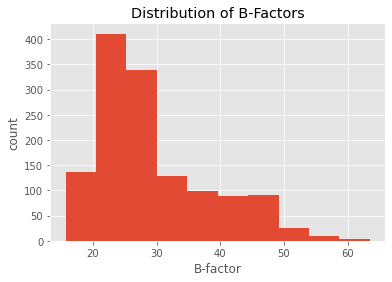

In [23]:
pmmcif.df['ATOM']['B_iso_or_equiv'].plot(kind='hist')
plt.title('Distribution of B-Factors')
plt.xlabel('B-factor')
plt.ylabel('count')
plt.show()

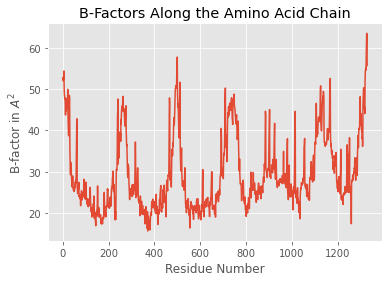

In [24]:
pmmcif.df['ATOM']['B_iso_or_equiv'].plot(kind='line')
plt.title('B-Factors Along the Amino Acid Chain')
plt.xlabel('Residue Number')
plt.ylabel('B-factor in $A^2$')
plt.show()

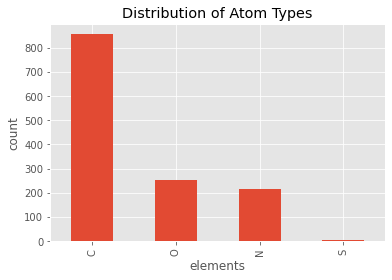

In [25]:
pmmcif.df['ATOM']['type_symbol'].value_counts().plot(kind='bar')
plt.title('Distribution of Atom Types')
plt.xlabel('elements')
plt.ylabel('count')
plt.show()

## Computing the Root Mean Square Deviation

BioPandas also comes with certain convenience functions, for example, ...

The Root-mean-square deviation (RMSD) is simply a measure of the average distance between atoms of 2 protein or ligand structures. This calculation of the Cartesian error follows the equation:

$$
RMSD(a, b) = \sqrt{\frac{1}{n} \sum^{n}_{i=1} \big((a_{ix})^2 + (a_{iy})^2 + (a_{iz})^2 \big)}
= \sqrt{\frac{1}{n} \sum^{n}_{i=1} || a_i + b_i||_2^2}
$$

So, assuming that the we have the following 2 conformations of a ligand molecule

![](./img/ligand_rmsd.png)

we can compute the RMSD as follows:

In [26]:
from biopandas.mmcif import PandasMmcif

l_1 = PandasMmcif().read_mmcif('./data/lig_conf_1.cif')
l_2 = PandasMmcif().read_mmcif('./data/lig_conf_2.cif')
r = PandasMmcif.rmsd(l_1.df['HETATM'], l_2.df['HETATM'],
                   s=None) # all atoms, including hydrogens
print('RMSD: %.4f Angstrom' % r)

RMSD: 2.6444 Angstrom


[File links: [lig_conf_1.cif](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/lig_conf_1.cif), [lig_conf_2.cif](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/lig_conf_2.cif)]

In [27]:
r = PandasMmcif.rmsd(l_1.df['HETATM'], l_2.df['HETATM'], 
                     s='carbon') # carbon atoms only
print('RMSD: %.4f Angstrom' % r)

RMSD: 1.7249 Angstrom


In [28]:
r = PandasMmcif.rmsd(l_1.df['HETATM'], l_2.df['HETATM'], 
                   s='heavy') # heavy atoms only
print('RMSD: %.4f Angstrom' % r)

RMSD: 1.9959 Angstrom


Similarly, we can compute the RMSD between 2 related protein structures:

![](./img/1t48_rmsd.png)

The hydrogen-free RMSD:

In [29]:
p_1 = PandasMmcif().read_mmcif('./data/1t48_995.cif')
p_2 = PandasMmcif().read_mmcif('./data/1t49_995.cif')
r = PandasMmcif.rmsd(p_1.df['ATOM'], p_2.df['ATOM'], s='heavy')
print('RMSD: %.4f Angstrom' % r)

RMSD: 0.7377 Angstrom


Or the RMSD between the main chains only:

In [30]:
p_1 = PandasMmcif().read_mmcif('./data/1t48_995.cif')
p_2 = PandasMmcif().read_mmcif('./data/1t49_995.cif')
r = PandasMmcif.rmsd(p_1.df['ATOM'], p_2.df['ATOM'], s='main chain')
print('RMSD: %.4f Angstrom' % r)

RMSD: 0.4781 Angstrom


<br>

## Filtering PDBs by Distance

We can use the `distance` method to compute the distance between each atom (or a subset of atoms) in our data frame and a three-dimensional reference point. For example:

In [31]:
p_1 = PandasMmcif().read_mmcif('./data/3eiy.cif')

reference_point = (9.362, 41.410, 10.542)
distances = p_1.distance(xyz=reference_point, records=('ATOM',))

[File link: [3eiy.cif](https://raw.githubusercontent.com/rasbt/biopandas/main/docs/tutorials/data/3eiy.cif)]

The distance method returns a Pandas Series object:

In [32]:
distances.head()

0    19.267419
1    18.306060
2    16.976934
3    16.902897
4    18.124171
dtype: float64

And we can use this `Series` object, for instance, to select certain atoms in our DataFrame that fall within a desired distance threshold. For example, let's select all atoms that are within 7A of our reference point: 

In [33]:
all_within_7A = p_1.df['ATOM'][distances < 7.0]
all_within_7A.tail()

group_PDB   id type_symbol label_atom_id  ... auth_comp_id auth_asym_id auth_atom_id  pdbx_PDB_model_num
786      ATOM  787           C            CB  ...          LEU            A           CB                   1
787      ATOM  788           C            CG  ...          LEU            A           CG                   1
788      ATOM  789           C           CD1  ...          LEU            A          CD1                   1
789      ATOM  790           C           CD2  ...          LEU            A          CD2                   1
790      ATOM  791           N             N  ...          VAL            A            N                   1

[5 rows x 21 columns]

Visualized in PyMOL, this subset (yellow surface) would look as follows:
    
![](./img/3eiy_7a.png)

## Converting Amino Acid codes from 3- to 1-letter codes

Residues in the `residue_name` field can be converted into 1-letter amino acid codes, which may be useful for further sequence analysis, for example, pair-wise or multiple sequence alignments:

In [34]:
from biopandas.mmcif import PandasMmcif


pmmcif = PandasMmcif().fetch_mmcif('5mtn')
sequence = pmmcif.amino3to1()
sequence.tail()

auth_asym_id auth_comp_id
1378            B            I
1386            B            N
1394            B            Y
1406            B            R
1417            B            T

As shown above, the `amino3to1` method returns a `DataFrame` containing the `auth_asym_id` (chain ID) and `auth_comp_id` (residue name) of the translated 1-letter amino acids. If you like to work with the sequence as a Python list of string characters, you could do the following:

In [35]:
sequence_list = list(sequence.loc[sequence['auth_asym_id'] == 'A', 'auth_comp_id'])
sequence_list[-5:] # last 5 residues of chain A

['V', 'R', 'H', 'Y', 'T']

And if you prefer to work with the sequence as a string, you can use the `join` method: 

In [36]:
''.join(sequence.loc[sequence['auth_asym_id'] == 'A', 'auth_comp_id'])

'SLEPEPWFFKNLSRKDAERQLLAPGNTHGSFLIRESESTAGSFSLSVRDFDQGEVVKHYKIRNLDNGGFYISPRITFPGLHELVRHYT'

To iterate over the sequences of multi-chain proteins, you can use the `unique` method as shown below:

In [37]:
for chain_id in sequence['auth_asym_id'].unique():
    print('\nChain ID: %s' % chain_id)
    print(''.join(sequence.loc[sequence['auth_asym_id'] == chain_id, 'auth_comp_id']))


Chain ID: A
SLEPEPWFFKNLSRKDAERQLLAPGNTHGSFLIRESESTAGSFSLSVRDFDQGEVVKHYKIRNLDNGGFYISPRITFPGLHELVRHYT

Chain ID: B
SVSSVPTKLEVVAATPTSLLISWDAPAVTVVYYLITYGETGSPWPGGQAFEVPGSKSTATISGLKPGVDYTITVYAHRSSYGYSENPISINYRT
